In [1]:
import os
print(os.getcwd())

/DATA05/home/youwone/Singlecell/SCLC


In [2]:
import sys
sys.path

['/DATA05/home/youwone/Singlecell/SCLC',
 '/usr/lib64/python39.zip',
 '/usr/lib64/python3.9',
 '/usr/lib64/python3.9/lib-dynload',
 '',
 '/DATA05/home/youwone/.local/lib/python3.9/site-packages',
 '/usr/local/lib64/python3.9/site-packages',
 '/usr/local/lib/python3.9/site-packages',
 '/usr/lib64/python3.9/site-packages',
 '/usr/lib/python3.9/site-packages',
 '/DATA05/home/youwone/.local/lib/python3.9/site-packages/setuptools/_vendor']

In [3]:
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

In [4]:
import numpy as np
np.version

<module 'numpy.version' from '/DATA05/home/youwone/.local/lib/python3.9/site-packages/numpy/version.py'>

In [5]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib as mpl
import anndata
#import bbknn
import os
from scipy import sparse

from matplotlib import rcParams

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('default')  

sc.settings.set_figure_params(dpi=80)

sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
#sc.logging.print_versions()
sc.logging.print_header()

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
2024-11-25 10:47:54.543165: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-25 10:47:54.673915: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-25 10:47:54.677228: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'

scanpy==1.9.8 anndata==0.10.8 umap==0.5.3 numpy==1.23.5 scipy==1.12.0 pandas==1.5.3 scikit-learn==1.5.1 statsmodels==0.13.5 igraph==0.9.9 louvain==0.7.0 pynndescent==0.5.4


In [6]:
#gt
adata_celltype =sc.read('Public_SCLC_annotated.h5ad')
adata_celltype


/DATA05/home/youwone/.local/lib/python3.9/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


AnnData object with n_obs × n_vars = 84566 × 2434
    obs: 'ngenes', 'libsize', 'mito_frac', 'RBP_frac', 'batch', 'donor_id', 'treatment', 'procedure', 'histo', 'cell_type_coarse', 'cell_type_fine', 'cell_type_general', 'clusters', 'cell_type_med', 'H_knn', 'development_stage_ontology_term_id', 'sex_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'assay_ontology_term_id', 'is_primary_data', 'tissue_ontology_term_id', 'disease_ontology_term_id', 'organism_ontology_term_id', 'cell_type_ontology_term_id', 'suspension_type', 'HTAN_Biospecimen_ID', 'HTAN_Participant_ID', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'doublet_score', 'predicted_doublets', 'leiden_0.3', 'leiden_0.03', 'leiden_0.04', 'leiden_0.07', 'CELL_type'
    var: 'feature_is_filtered', 'feature_reference', 'feature_biotype',

In [7]:
adata=sc.read('./SCLC_Public_trim_raw_qc.h5ad')
adata

/DATA05/home/youwone/.local/lib/python3.9/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(
/DATA05/home/youwone/.local/lib/python3.9/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


AnnData object with n_obs × n_vars = 84566 × 22349
    obs: 'ngenes', 'libsize', 'mito_frac', 'RBP_frac', 'batch', 'donor_id', 'treatment', 'procedure', 'histo', 'cell_type_coarse', 'cell_type_fine', 'cell_type_general', 'clusters', 'cell_type_med', 'H_knn', 'development_stage_ontology_term_id', 'sex_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'assay_ontology_term_id', 'is_primary_data', 'tissue_ontology_term_id', 'disease_ontology_term_id', 'organism_ontology_term_id', 'cell_type_ontology_term_id', 'suspension_type', 'HTAN_Biospecimen_ID', 'HTAN_Participant_ID', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'doublet_score', 'predicted_doublets'
    var: 'feature_is_filtered', 'feature_reference', 'feature_biotype', 'feature_length', 'feature_type', 'n_cells', 'mt', 'n_cells_by_counts'

In [8]:
adata.var.head()

,feature_is_filtered,feature_reference,feature_biotype,feature_length,feature_type,n_cells,mt,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts
feature_name,,,,,,,,,,,
A1BG,False,NCBITaxon:9606,gene,2134,protein_coding,27626,False,27626,0.250824,67.445204,21284.976562
A1CF,False,NCBITaxon:9606,gene,2211,protein_coding,2414,False,2414,0.018195,97.155315,1544.034912
A2M,False,NCBITaxon:9606,gene,590,protein_coding,2694,False,2694,0.048127,96.825359,4084.033936
A2ML1,False,NCBITaxon:9606,gene,592,protein_coding,32,False,32,0.000200,99.962291,16.991318
A4GALT,False,NCBITaxon:9606,gene,1956,protein_coding,5360,False,5360,0.034924,93.683714,2963.678711


In [9]:
adata.obs['CELL_type']=adata_celltype.obs['CELL_type']

In [10]:
import infercnvpy as cnv
matplotlib.style.use('default')  

sc.settings.set_figure_params(dpi=80)

sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
#sc.logging.print_versions()
sc.logging.print_header()

scanpy==1.9.8 anndata==0.10.8 umap==0.5.3 numpy==1.23.5 scipy==1.12.0 pandas==1.5.3 scikit-learn==1.5.1 statsmodels==0.13.5 igraph==0.9.9 louvain==0.7.0 pynndescent==0.5.4


In [11]:
cnv.io.genomic_position_from_gtf('./gencode.v40.annotation.gtf.gz',adata)

/DATA05/home/youwone/.local/lib/python3.9/site-packages/gtfparse/read_gtf.py:82: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  chunk_iterator = pd.read_csv(
/DATA05/home/youwone/.local/lib/python3.9/site-packages/gtfparse/read_gtf.py:82: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  chunk_iterator = pd.read_csv(
INFO:root:Extracted GTF attributes: ['gene_id', 'gene_name']


In [12]:
adata.obs['CELL_type'].unique()

['Epithelial cell', 'Immune cell', 'Fibroblast', 'Endothelial cell']
Categories (4, object): ['Endothelial cell', 'Epithelial cell', 'Fibroblast', 'Immune cell']

In [13]:
cnv.tl.infercnv(adata,reference_key='CELL_type',reference_cat= 'Immune cell',window_size=100,)
cnv.tl.pca( adata,svd_solver='arpack')
cnv.pp.neighbors( adata)
cnv.tl.leiden( adata)
cnv.tl.umap( adata)
cnv.tl.cnv_score( adata)

  0%|          | 0/17 [00:00<?, ?it/s]

computing PCA
    with n_comps=50


/DATA05/home/youwone/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:430: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


    finished (0:00:12)
computing neighbors
    finished: added to `.uns['cnv_neighbors']`
    `.obsp['cnv_neighbors_distances']`, distances for each pair of neighbors
    `.obsp['cnv_neighbors_connectivities']`, weighted adjacency matrix (0:00:17)
running Leiden clustering
    finished: found 24 clusters and added
    'cnv_leiden', the cluster labels (adata.obs, categorical) (0:00:14)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:01:17)


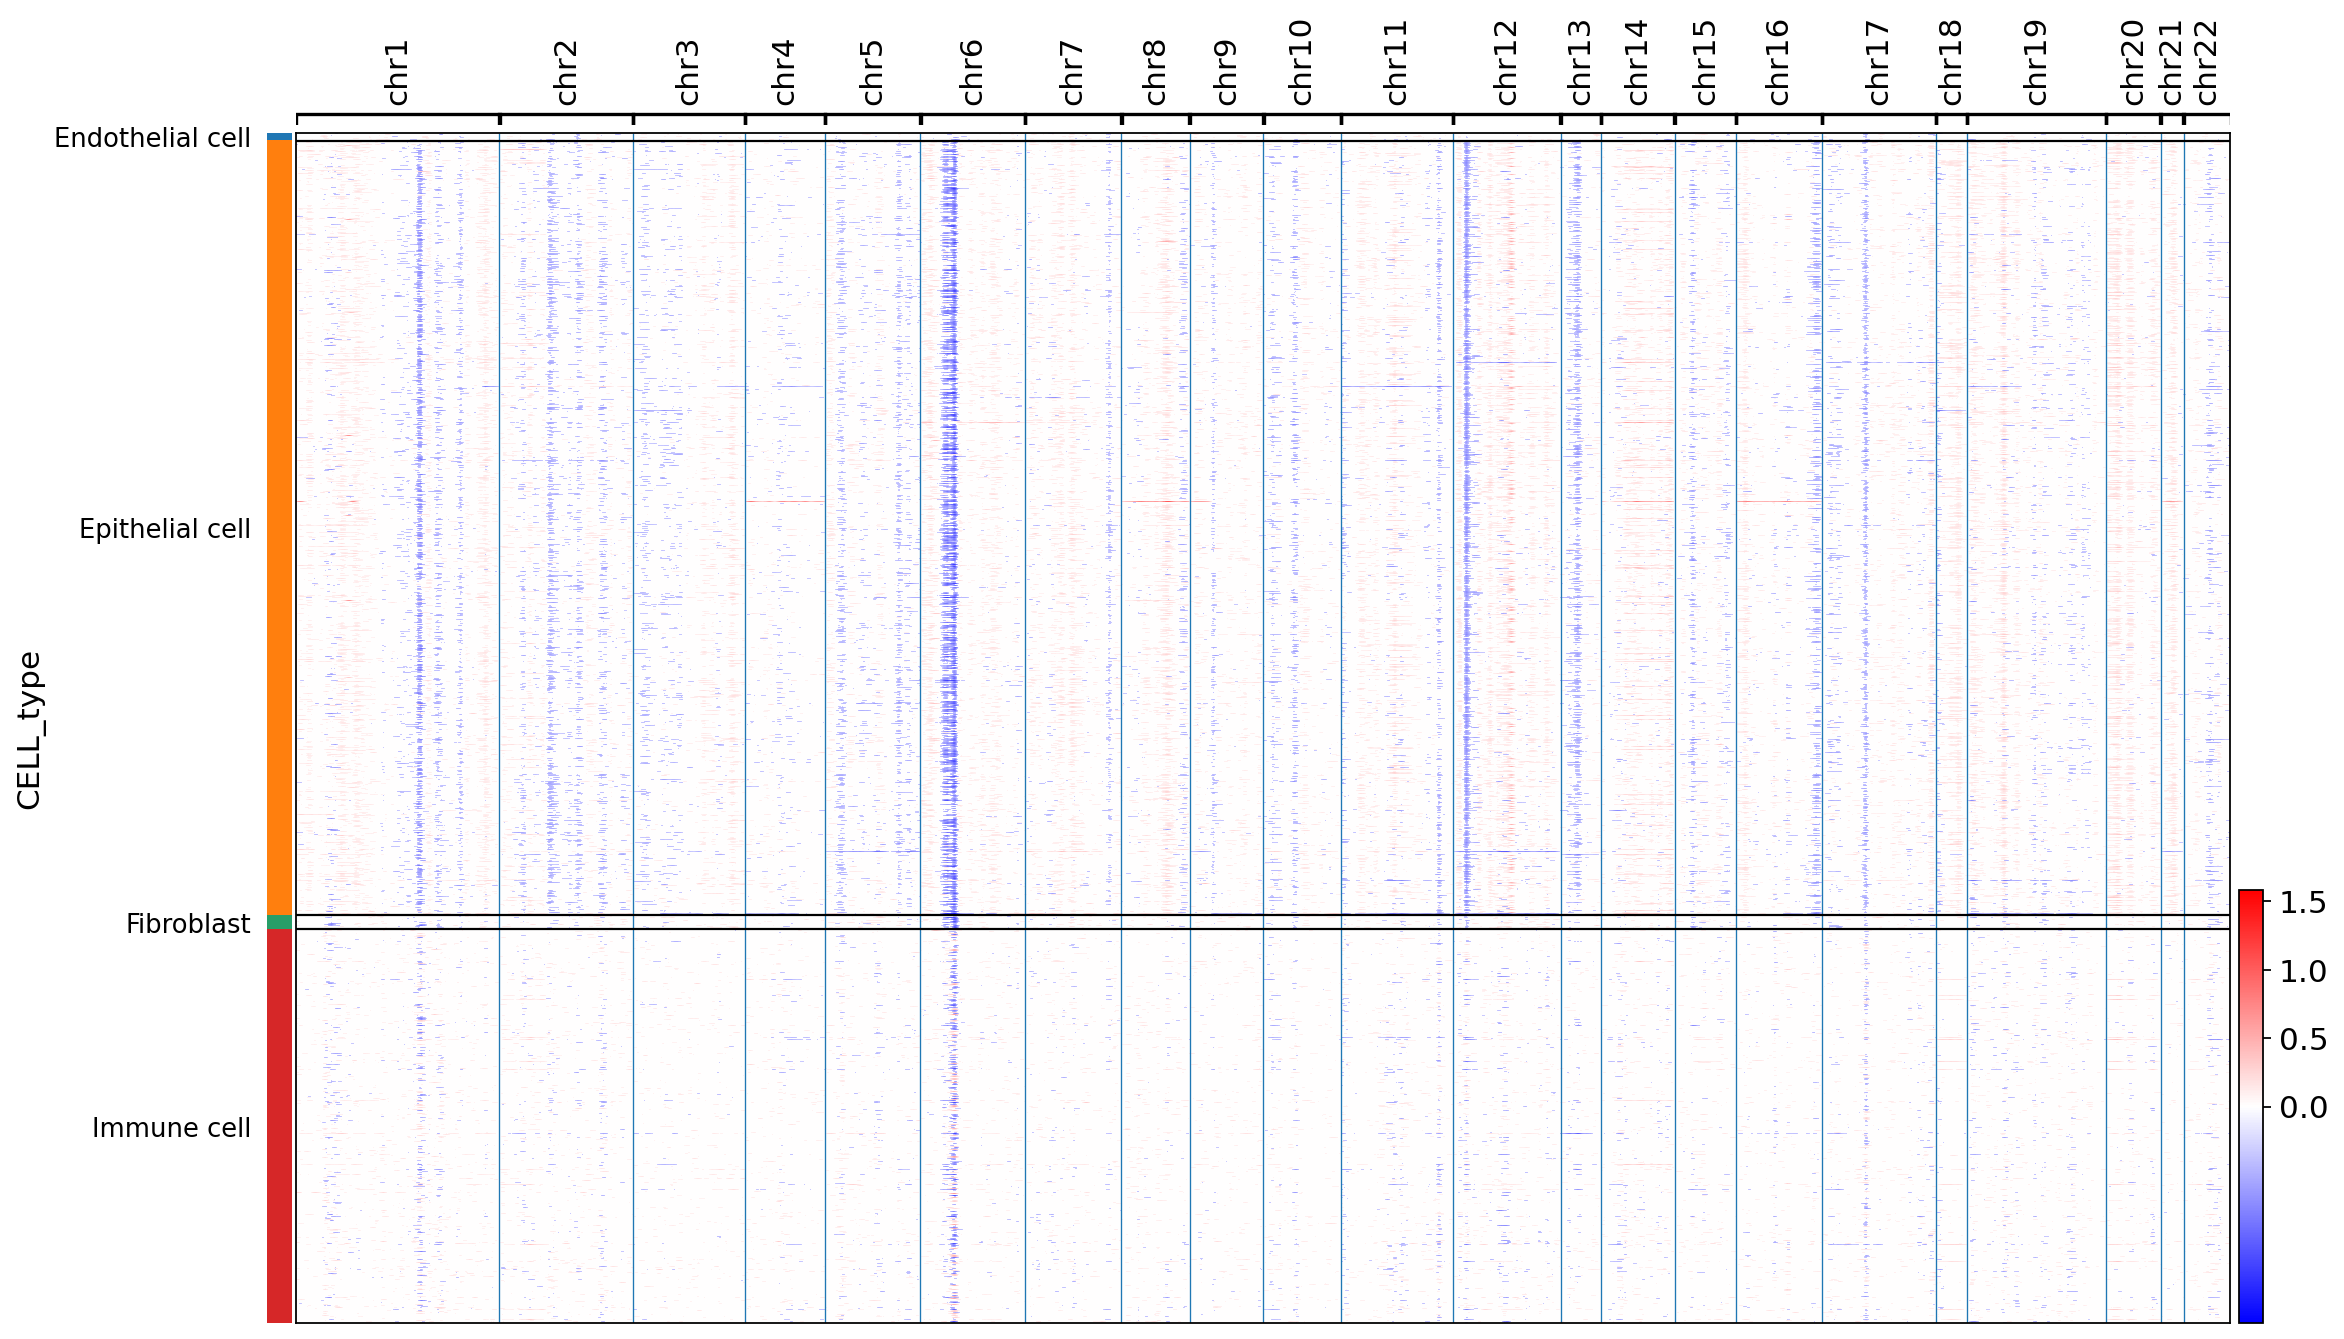

In [14]:
cnv.pl.chromosome_heatmap(adata, groupby='CELL_type')

In [15]:
adata.write('./Public_SCLC_withcnvscore.h5ad')

... storing 'chromosome' as categorical
... storing 'gene_id' as categorical
... storing 'gene_name' as categorical


In [16]:
adata

AnnData object with n_obs × n_vars = 84566 × 22349
    obs: 'ngenes', 'libsize', 'mito_frac', 'RBP_frac', 'batch', 'donor_id', 'treatment', 'procedure', 'histo', 'cell_type_coarse', 'cell_type_fine', 'cell_type_general', 'clusters', 'cell_type_med', 'H_knn', 'development_stage_ontology_term_id', 'sex_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'assay_ontology_term_id', 'is_primary_data', 'tissue_ontology_term_id', 'disease_ontology_term_id', 'organism_ontology_term_id', 'cell_type_ontology_term_id', 'suspension_type', 'HTAN_Biospecimen_ID', 'HTAN_Participant_ID', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'doublet_score', 'predicted_doublets', 'CELL_type', 'cnv_leiden', 'cnv_score'
    var: 'feature_is_filtered', 'feature_reference', 'feature_biotype', 'feature_length', 'feature_typ

/DATA05/home/youwone/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


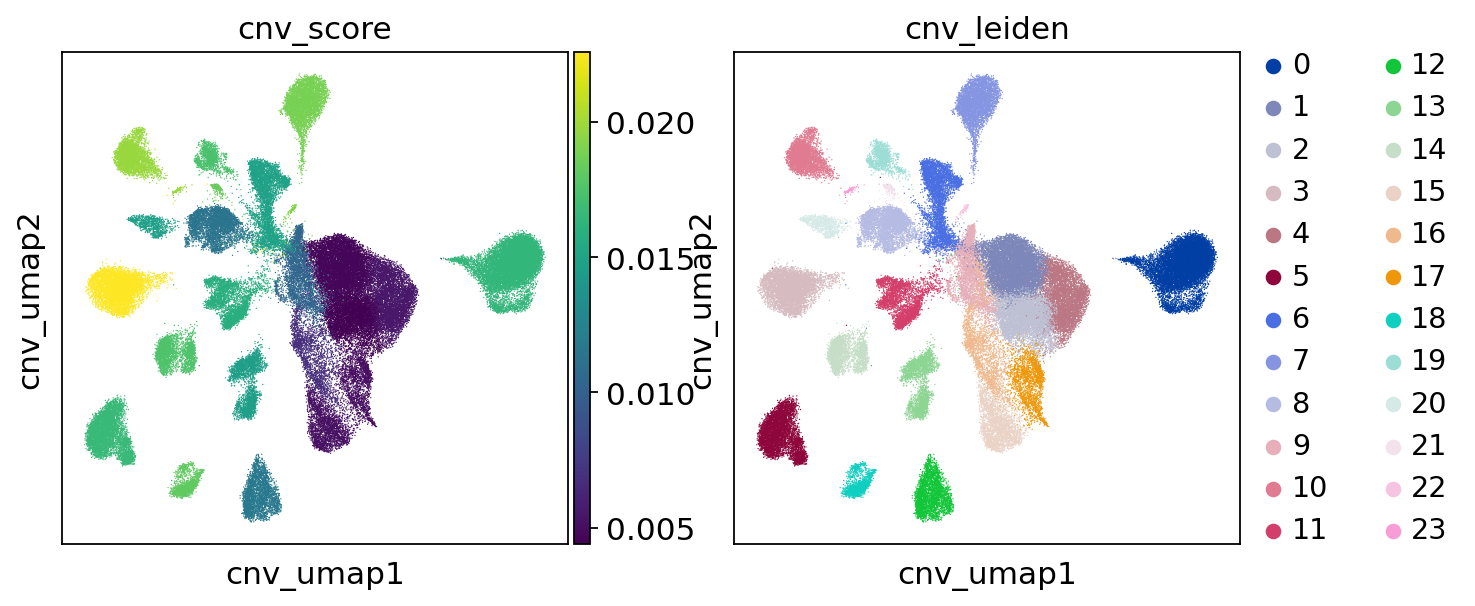

In [17]:
cnv.pl.umap(adata, color=["cnv_score","cnv_leiden"], show=True)

adata.obs[['cnv_score']].to_csv('./Public_SCLC_immune_reference_infercnv.csv')

In [18]:
adata

AnnData object with n_obs × n_vars = 84566 × 22349
    obs: 'ngenes', 'libsize', 'mito_frac', 'RBP_frac', 'batch', 'donor_id', 'treatment', 'procedure', 'histo', 'cell_type_coarse', 'cell_type_fine', 'cell_type_general', 'clusters', 'cell_type_med', 'H_knn', 'development_stage_ontology_term_id', 'sex_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'assay_ontology_term_id', 'is_primary_data', 'tissue_ontology_term_id', 'disease_ontology_term_id', 'organism_ontology_term_id', 'cell_type_ontology_term_id', 'suspension_type', 'HTAN_Biospecimen_ID', 'HTAN_Participant_ID', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'doublet_score', 'predicted_doublets', 'CELL_type', 'cnv_leiden', 'cnv_score'
    var: 'feature_is_filtered', 'feature_reference', 'feature_biotype', 'feature_length', 'feature_typ

In [19]:
infer=pd.read_csv('./Public_SCLC_immune_reference_infercnv.csv')

In [20]:
infer

,Cell,cnv_score
0,RU1215_192110488599350,0.011418
1,RU1152_130751366121844,0.018173
2,RU1231A_120703424294126,0.016676
3,RU779D_231906420612515,0.004619
4,RU1322A_LN_133924258008493,0.011784
...,...,...
84561,RU684_N_192325908355814,0.004378
84562,RU1108a_Bambanker_Frozen_231897696155998,0.016382
84563,RU1138_235198540340019,0.004619
84564,RU1181B_236168014327141,0.018896


In [21]:
infer.index=infer['Cell']
infer

,Cell,cnv_score
Cell,,
RU1215_192110488599350,RU1215_192110488599350,0.011418
RU1152_130751366121844,RU1152_130751366121844,0.018173
RU1231A_120703424294126,RU1231A_120703424294126,0.016676
RU779D_231906420612515,RU779D_231906420612515,0.004619
RU1322A_LN_133924258008493,RU1322A_LN_133924258008493,0.011784
...,...,...
RU684_N_192325908355814,RU684_N_192325908355814,0.004378
RU1108a_Bambanker_Frozen_231897696155998,RU1108a_Bambanker_Frozen_231897696155998,0.016382
RU1138_235198540340019,RU1138_235198540340019,0.004619


In [22]:
adata.obs['cnv_score']=infer.cnv_score

In [23]:
cells_of_interest = adata.obs.loc[adata.obs['CELL_type'].isin([  
  'Epithelial cell',
]),:].index
Epi=  adata[cells_of_interest, :]

In [24]:
Epi

View of AnnData object with n_obs × n_vars = 54992 × 22349
    obs: 'ngenes', 'libsize', 'mito_frac', 'RBP_frac', 'batch', 'donor_id', 'treatment', 'procedure', 'histo', 'cell_type_coarse', 'cell_type_fine', 'cell_type_general', 'clusters', 'cell_type_med', 'H_knn', 'development_stage_ontology_term_id', 'sex_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'assay_ontology_term_id', 'is_primary_data', 'tissue_ontology_term_id', 'disease_ontology_term_id', 'organism_ontology_term_id', 'cell_type_ontology_term_id', 'suspension_type', 'HTAN_Biospecimen_ID', 'HTAN_Participant_ID', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'doublet_score', 'predicted_doublets', 'CELL_type', 'cnv_leiden', 'cnv_score'
    var: 'feature_is_filtered', 'feature_reference', 'feature_biotype', 'feature_length', 'fea

In [25]:
Epi_Tu_2 = Epi[Epi.obs['histo']=="SCLC",]
Epi_no_2 = Epi[Epi.obs['histo']=="normal",]

In [26]:
b_2=Epi_Tu_2.obs.cnv_score
a_2=Epi_no_2.obs.cnv_score

In [37]:
b_2.median()

0.0163820244844679

In [36]:
a_2.median()

0.0104015878180601

/tmp/ipykernel_1966139/3334114618.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a_2, color='skyblue',label='normal')
/tmp/ipykernel_1966139/3334114618.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(b_2, color='red',label='SCLC')


<AxesSubplot: xlabel='cnv_score', ylabel='Density'>

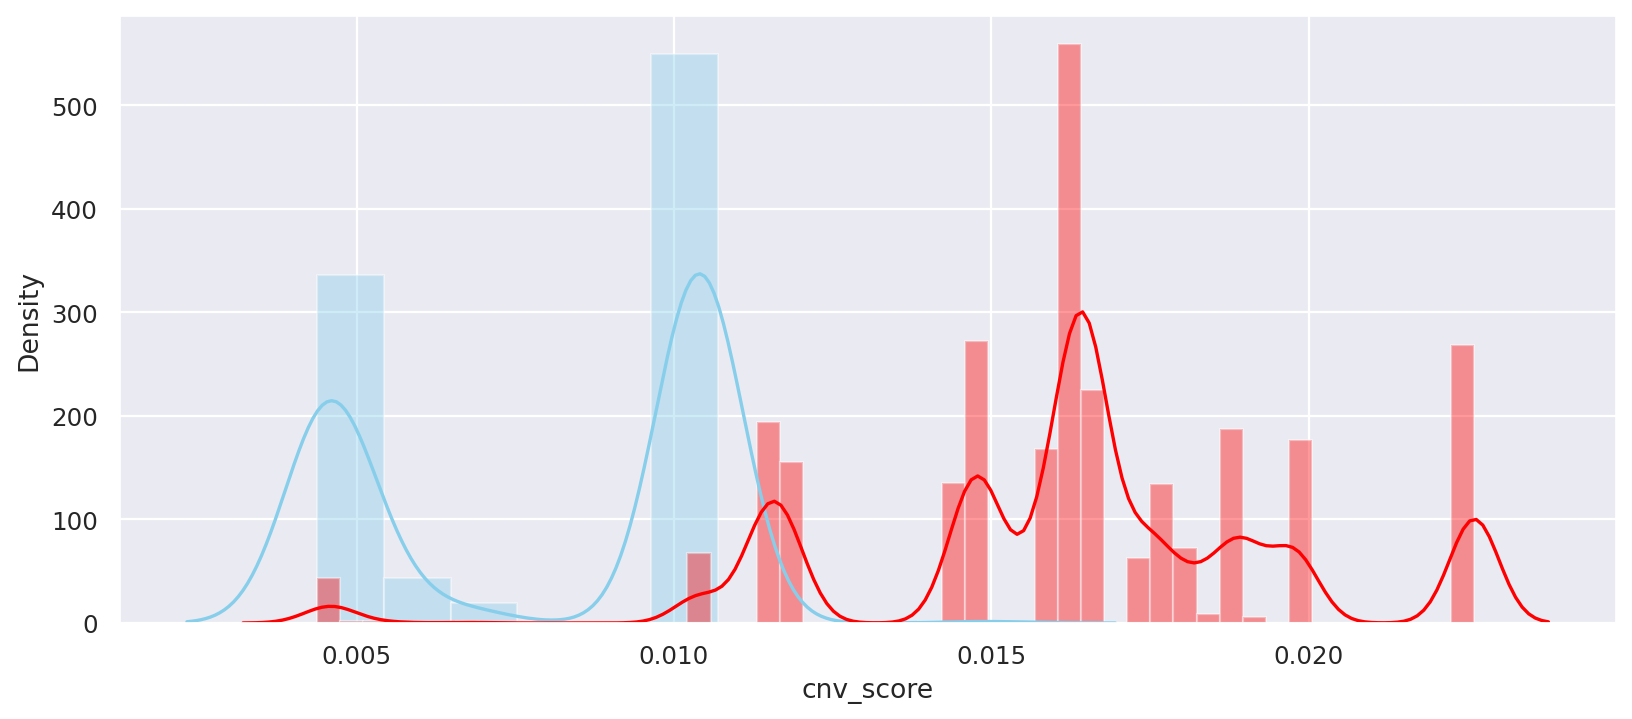

In [29]:
import seaborn as sns
sns.set(rc={'figure.figsize':(12,5)})
sns.distplot(a_2, color='skyblue',label='normal')
sns.distplot(b_2, color='red',label='SCLC')

In [38]:
threshold = 0.0104015878180601
adata.obs['predicted_tumor'] = pd.Categorical(['Tumor' if x > threshold else 'Normal' for x in adata.obs.cnv_score])
cells_of_interest = adata.obs.loc[adata.obs['CELL_type'].isin([  
  'Epithelial cell',
]),:].index
Epi=  adata[cells_of_interest, :]



In [39]:
Epi_no = Epi[Epi.obs['predicted_tumor']=="Normal",]
Epi_no.obs['cnv_score'].max()

0.0104015878180601

In [40]:
Epi

View of AnnData object with n_obs × n_vars = 54992 × 22349
    obs: 'ngenes', 'libsize', 'mito_frac', 'RBP_frac', 'batch', 'donor_id', 'treatment', 'procedure', 'histo', 'cell_type_coarse', 'cell_type_fine', 'cell_type_general', 'clusters', 'cell_type_med', 'H_knn', 'development_stage_ontology_term_id', 'sex_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'assay_ontology_term_id', 'is_primary_data', 'tissue_ontology_term_id', 'disease_ontology_term_id', 'organism_ontology_term_id', 'cell_type_ontology_term_id', 'suspension_type', 'HTAN_Biospecimen_ID', 'HTAN_Participant_ID', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'doublet_score', 'predicted_doublets', 'CELL_type', 'cnv_leiden', 'cnv_score', 'predicted_tumor'
    var: 'feature_is_filtered', 'feature_reference', 'feature_biotype', 'fe

In [41]:
Groups_tab = pd.crosstab(columns=Epi.obs['predicted_tumor'],  # Make a crosstab
                        index=Epi.obs['histo'], margins=True)
Groups_tab.head()

predicted_tumor,Normal,Tumor,All
histo,,,
SCLC,2269,51514,53783
normal,1206,3,1209
All,3475,51517,54992


In [42]:
adata.obs['predicted_tumor'].unique()

['Tumor', 'Normal']
Categories (2, object): ['Normal', 'Tumor']

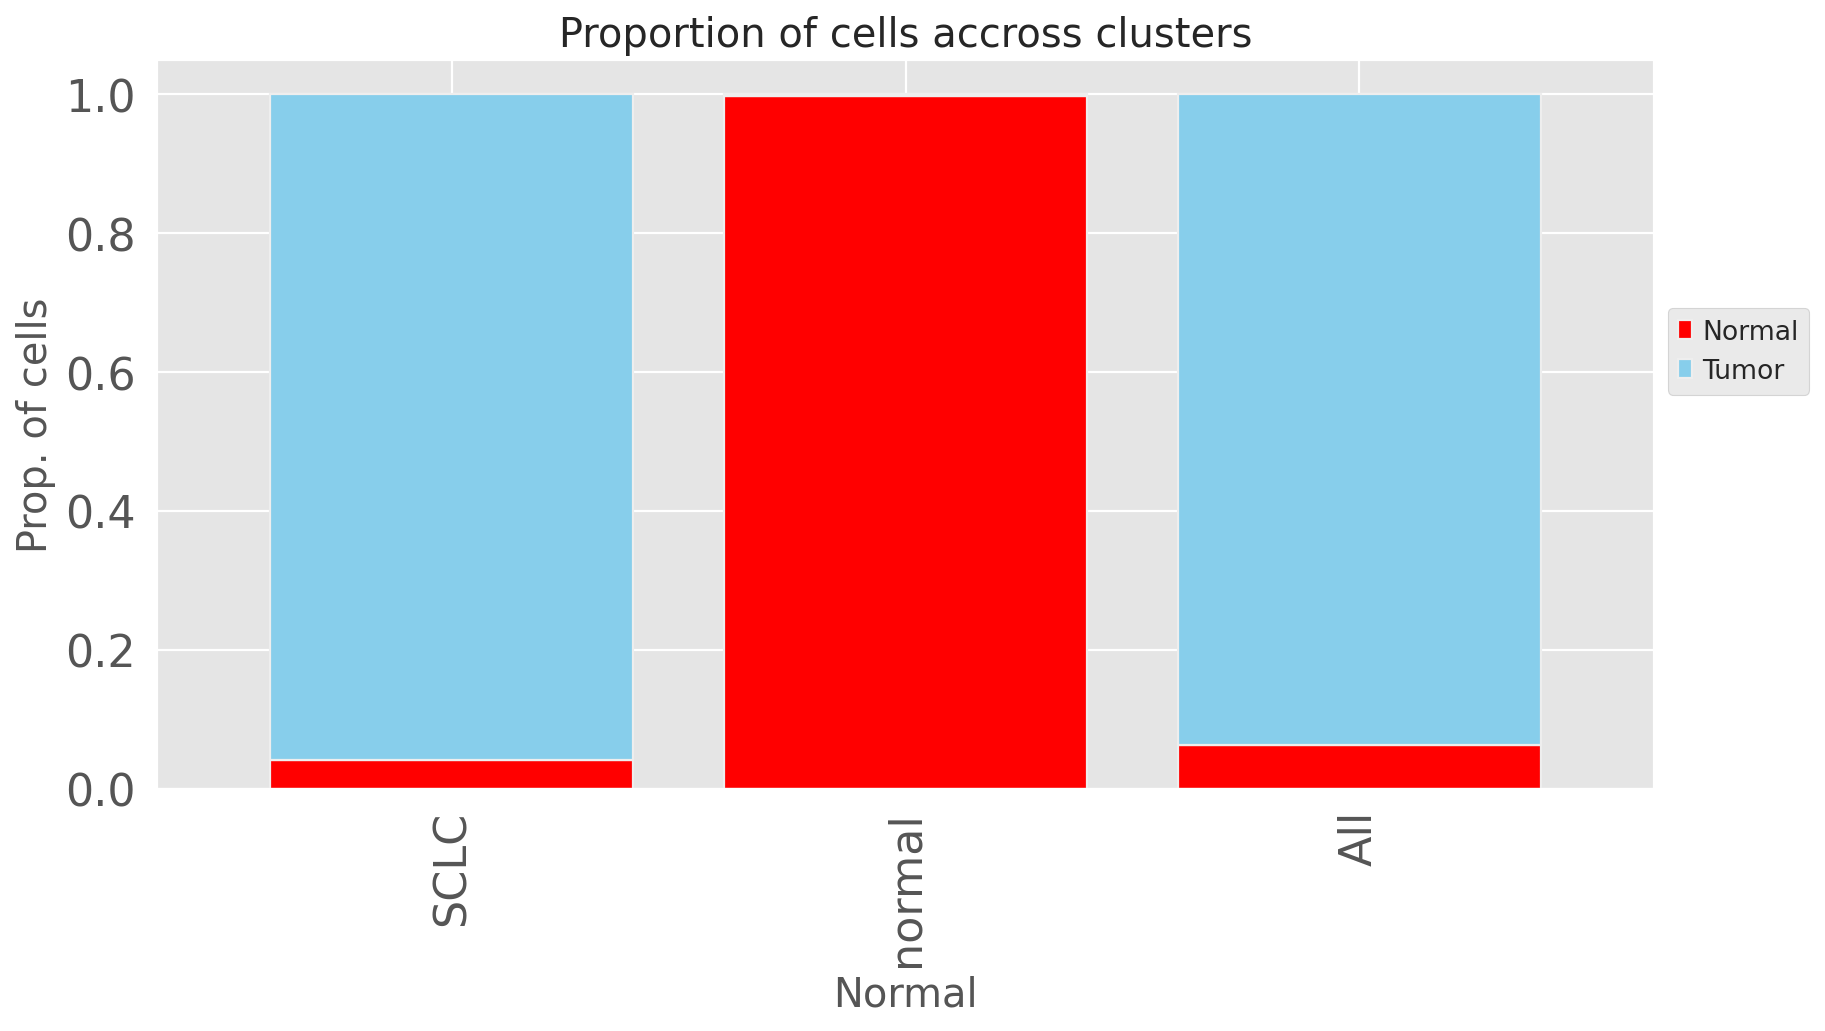

In [43]:
#-- proportion table

Groups_tab = pd.crosstab(columns=Epi.obs['predicted_tumor'],  # Make a crosstab
                        index=Epi.obs['histo'], margins=True)              # Name the count column


#-- change index and columns order
#Groups_tab = Groups_tab.reindex(['All','0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19'])
#Groups_tab = Groups_tab.reindex(['All','0','1','2','3','4','5','6','7','8','9','10'])

#Groups_tab = Groups_tab[['SLE','HD','All']]

MyTab= Groups_tab.div(Groups_tab["All"], axis=0)
MyTab2 = MyTab.drop(columns="All")

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')   
#colors
##Col_Group =["#756bb1","#78c679"] 
#Col_Group=['#e6194B', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#42d4f4', '#f032e6', '#bfef45', '#fabed4', 
                             #'#469990', '#dcbeff', '#9A6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#a9a9a9',
                            # '#a65628','#f781bf','#7fcdbb','#cab2d6', 
                           #"#060404", "#bdbdbd", "#addd8e","#fed976", "#7a0177",  "#df65b0",'#a65628','#33a02c',"#1f78b4",
                             #"#b2df8a","#33a02c","#fb9a99","#e31a1c", "#fdbf6f","#ff7f00","#cab2d6"]
Col_Group=['red','skyblue']
MyTab2.plot(kind="bar",
            figsize=(12,6),
            stacked=True, 
            linewidth=1, 
            width=0.8, fontsize=20, color=Col_Group)
plt.title("Proportion of cells accross clusters", fontsize=18)
plt.ylabel("Prop. of cells", fontsize=18)
plt.xlabel("Normal", fontsize=18)
plt.ylim=1.0


#plt.gca().get_legend().remove() #remove legend
plt.legend(loc='center left', bbox_to_anchor=(1, 0.6), fontsize=12)
plt.show()

In [44]:
adata.write('./Public_SCLC_withcnvscore.h5ad')